# Basic time series prediction

This is really to just get our predictions working. Let's validate my models against Judenes. So we will limit this study to:
- same datasets as Judene
- same lag length
- lets visualize the training the curve

In [1]:
from one_dimensional_time_series_forecasting import time_series_prediction, hit_rate
import pandas as pd

# model evalution metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# data preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

# interactive figures
%matplotlib widget 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

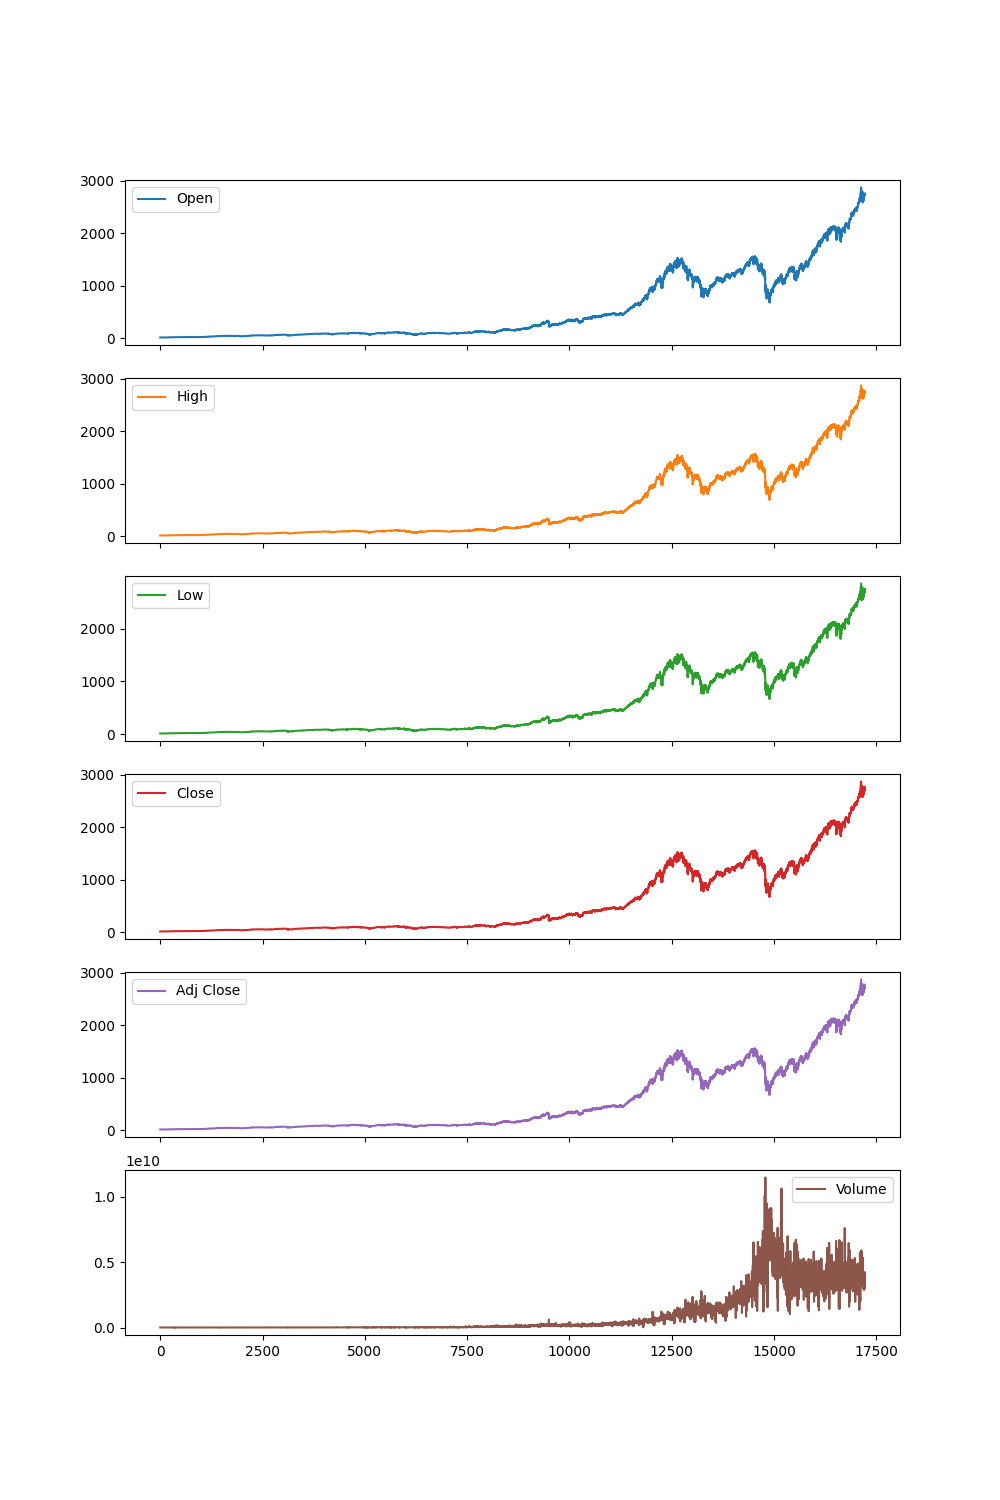

In [2]:
# import data
df = pd.read_csv('./test_data/GSPC.csv')

# visualize data
df.plot(subplots=True,figsize=(10,15))

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17218 entries, 0 to 17217
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       17218 non-null  object 
 1   Open       17218 non-null  float64
 2   High       17218 non-null  float64
 3   Low        17218 non-null  float64
 4   Close      17218 non-null  float64
 5   Adj Close  17218 non-null  float64
 6   Volume     17218 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 941.7+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


## setup problem and train models

In [17]:
# feature engineering returns data: 
 
# select appropriate data range
df_date_limited = df[df['Date'] > '2002-01-01']

# difference data
df_returns = pd.DataFrame()
df_returns['date'] = df_date_limited['Date']
df_returns['daily_return'] = df_date_limited['Close'].diff(periods=1)

# reindex from 0-n
df_returns.reset_index(inplace=True, drop=True)

# due to difference first value is nan, drop this row
df_returns.drop(labels=0,axis=0, inplace=True) # drop first row

df_returns

,date,daily_return
1,2002-01-03,10.599976
2,2002-01-04,7.239990
3,2002-01-07,-7.619995
4,2002-01-08,-4.180054
5,2002-01-09,-5.569946
...,...,...
4131,2018-05-31,-18.739990
4132,2018-06-01,29.350097
4133,2018-06-04,12.250000
4134,2018-06-05,1.929932


In [18]:
4135*0.3

1240.5

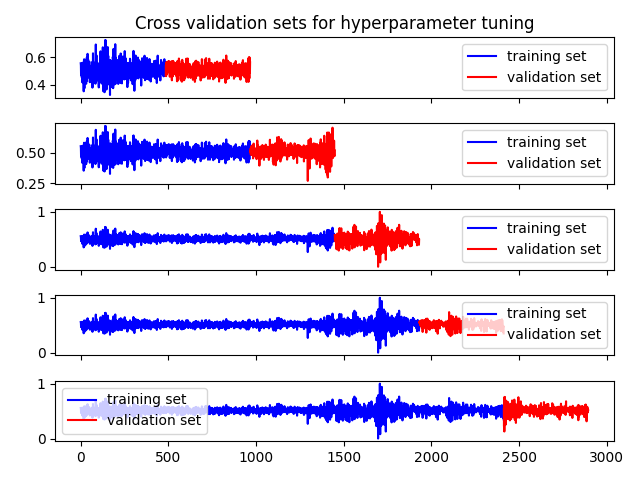


Naive model results:
MAPE: 0.18549172881868473
RMSE:  0.11348188365407622
MAE:  0.08094007743414074
Training multivariate linear regression:

Linear regression coefficients: 
 [-0.04846215 -0.10926729]
MAPE: 0.14611578729530764
RMSE:  0.0797104323197229
MAE:  0.055175814520361285

Training support vector machine:


/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_venvs/meng-data-science/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/tristan/my_ven

best_score:  -0.06462275182815908
best_model:  SVR(C=100, kernel='sigmoid', max_iter=5000, tol=1e-05)
best_params:  {'C': 100, 'kernel': 'sigmoid'}
MAPE: 0.7111041015988712
RMSE:  7.5854893568059065
MAE:  0.3660447719620033

Training neural network: 
best_score:  -0.06428680832995577
best_model:  MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 10, 10),
             learning_rate='adaptive', max_iter=5000, n_iter_no_change=200,
             shuffle=False, tol=1e-05)
best_params:  {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001}
MAPE: 0.14773382574134372
RMSE:  0.07962129408401607
MAE:  0.05485302665605572


,date,Value,Linear,SVM,NN,Naive
0,2002-01-03,0.556688,None,None,None,None
1,2002-01-04,0.540762,None,None,None,None
2,2002-01-07,0.470329,None,None,None,None
3,2002-01-08,0.486633,None,None,None,None
4,2002-01-09,0.480046,None,None,None,None
...,...,...,...,...,...,...
4130,2018-05-31,0.417622,0.496831,0.504493,0.503753,0.668309
4131,2018-06-01,0.645559,0.50915,0.504493,0.516359,0.417622
4132,2018-06-04,0.564508,0.496393,0.504493,0.503857,0.645559
4133,2018-06-05,0.515594,0.494203,0.504493,0.503364,0.564508


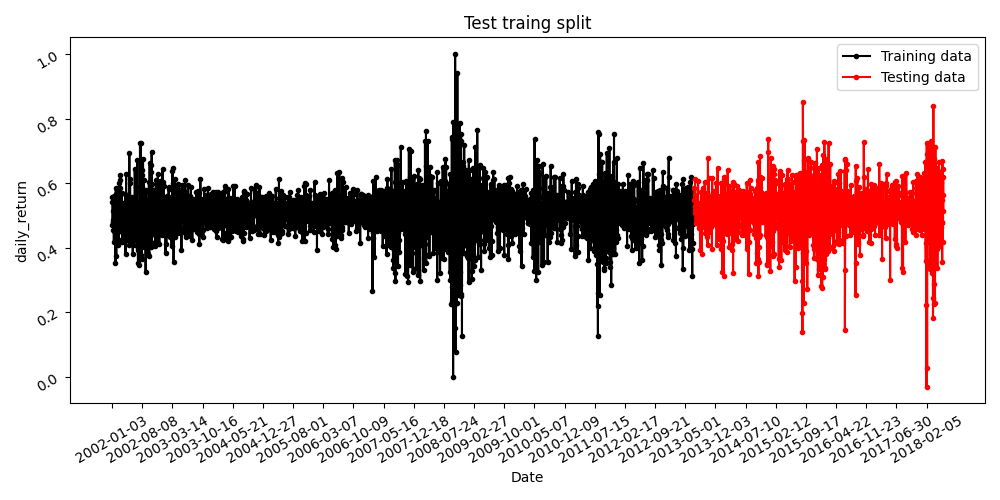

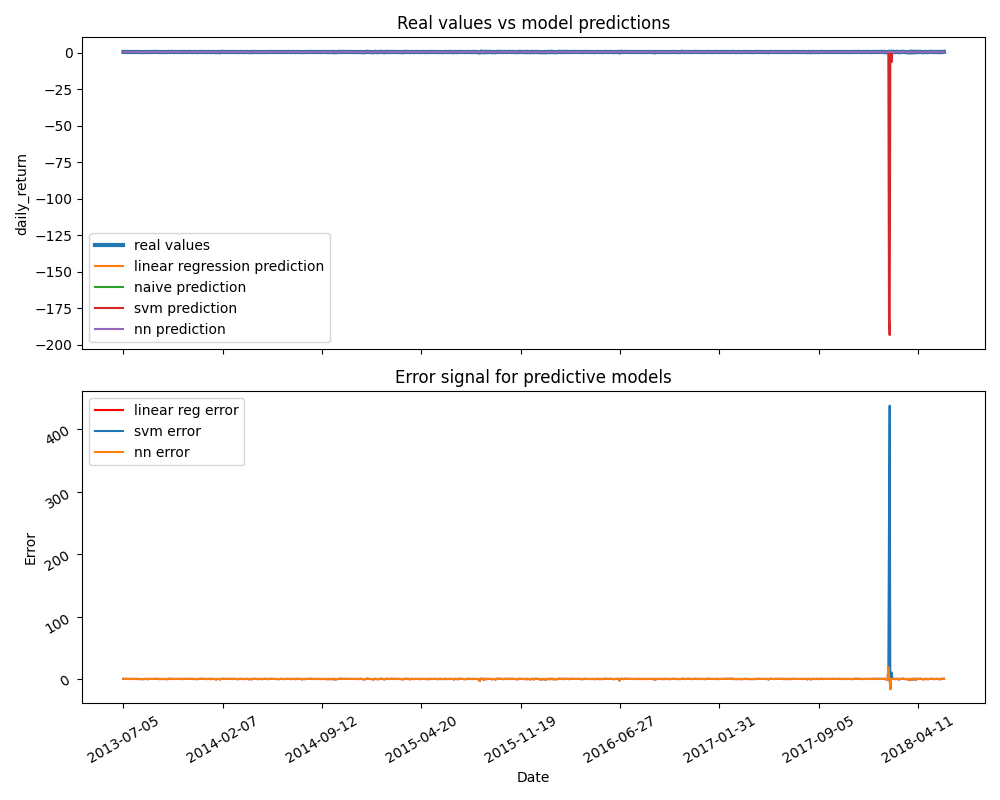

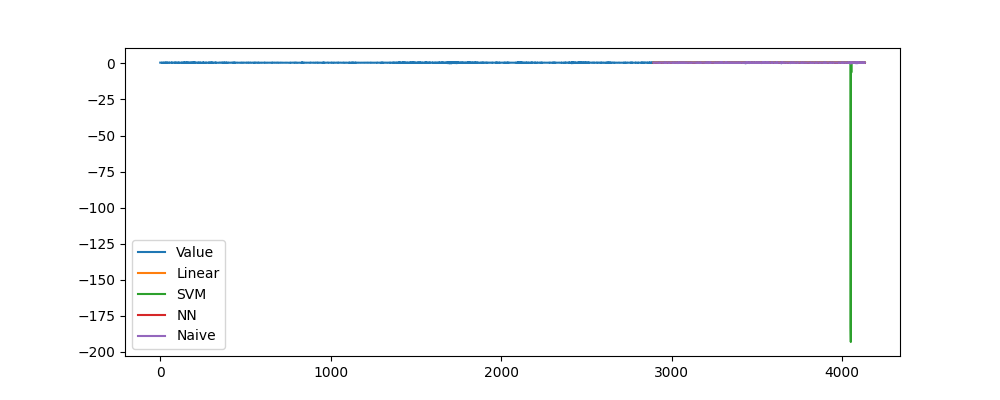

In [19]:
# model and forecast
window_length = 2
split = 1240 

# scale and transform data
scaler = MinMaxScaler()
scaled_training_data = scaler.fit_transform(df_returns['daily_return'][0:-split].to_numpy().reshape(-1,1)).flatten()
scaled_test_data = scaler.transform(df_returns['daily_return'][-split:].to_numpy().reshape(-1,1)).flatten()
data = np.append(scaled_training_data,scaled_test_data)

# model and forecast

# initialize class object
normal = time_series_prediction(df_returns['date'],data,window_length,1)# pass: time series dates, univariate time series, lag window length, a number of steps ahead to predict
normal.sliding_window_1(verbose=0) # time series to supervised ML problem
normal.train_test_split(split=split) # testing and training dataset split
normal.test_train_plot(steps=150,ylabel='daily_return')    # visualize training split

# perform some prediction tasks
normal.naive_model()
normal.linear_regression()
normal.support_vector_machine(model_tunning=True,verbose=0)
normal.neural_net_mlp(model_tunning=True,verbose=0)

# visualize results
normal.vis_results_time_series(second_plot='error',ylabel='daily_return')

# tabulate results
tabulated_results_0 = normal.results()
tabulated_results_0.plot(figsize=(10,4))
display(tabulated_results_0)


In [20]:
# what is the accuracy of price movements for these predictions

# data to feed to hit_rate function:
dates = tabulated_results_0['date'].iloc[split+window_length:]
original_values = tabulated_results_0['Value'].iloc[split+window_length:]
lin_predictions = tabulated_results_0['Linear'].iloc[split+window_length:]
svm_predictions = tabulated_results_0['SVM'].iloc[split+window_length:]
nn_predictions =  tabulated_results_0['NN'].iloc[split+window_length:]
naive_predictions =  tabulated_results_0['Naive'].iloc[split+window_length:]

# hit rate calculations
print('Linear Regression:')
df_lin = hit_rate(dates,original_values,lin_predictions)

print('SVM:')
df_svm = hit_rate(dates,original_values,svm_predictions)

print('NN:')
df_nn = hit_rate(dates,original_values,nn_predictions)

print('Naive:')
df_naive = hit_rate(dates,original_values,naive_predictions)

Linear Regression:
Movement prediction accuracy: 59.73 %
Confusion matrix:
[[1291  217]
 [ 948  437]]
SVM:
Movement prediction accuracy: 51.88 %
Confusion matrix:
[[1496   12]
 [1380    5]]
NN:
Movement prediction accuracy: 59.63 %
Confusion matrix:
[[1284  224]
 [ 944  441]]
Naive:
Movement prediction accuracy: 43.9 %
Confusion matrix:
[[1099  409]
 [1214  171]]


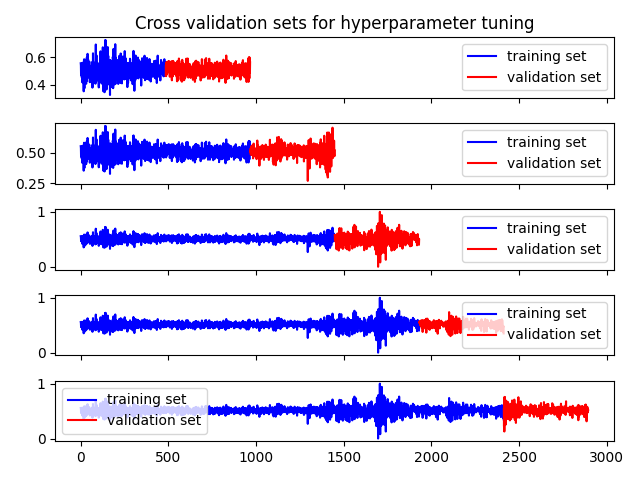


Naive model results:
MAPE: 0.18549172881868473
RMSE:  0.11348188365407622
MAE:  0.08094007743414074
Training multivariate linear regression:

Linear regression coefficients: 
 [-0.05450806 -0.01468714  0.01531485  0.04544598 -0.00297264  0.03921492
 -0.00094643  0.02305206 -0.02971478 -0.01147456 -0.04003651 -0.01968507
  0.00500567 -0.05120957 -0.10931745]
MAPE: 0.14742072777006762
RMSE:  0.07989058786431813
MAE:  0.05560292694215631

Training neural network: 
Model params: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 1e-05, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 200, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': False, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
MAPE: 0.14648020626206856
RMSE

,date,Value,Linear,SVM,NN,Naive
0,2002-01-03,0.556688,None,NaN,None,None
1,2002-01-04,0.540762,None,NaN,None,None
2,2002-01-07,0.470329,None,NaN,None,None
3,2002-01-08,0.486633,None,NaN,None,None
4,2002-01-09,0.480046,None,NaN,None,None
...,...,...,...,...,...,...
4130,2018-05-31,0.417622,0.487626,NaN,0.495049,0.668309
4131,2018-06-01,0.645559,0.501383,NaN,0.506372,0.417622
4132,2018-06-04,0.564508,0.498088,NaN,0.499808,0.645559
4133,2018-06-05,0.515594,0.503209,NaN,0.526508,0.564508


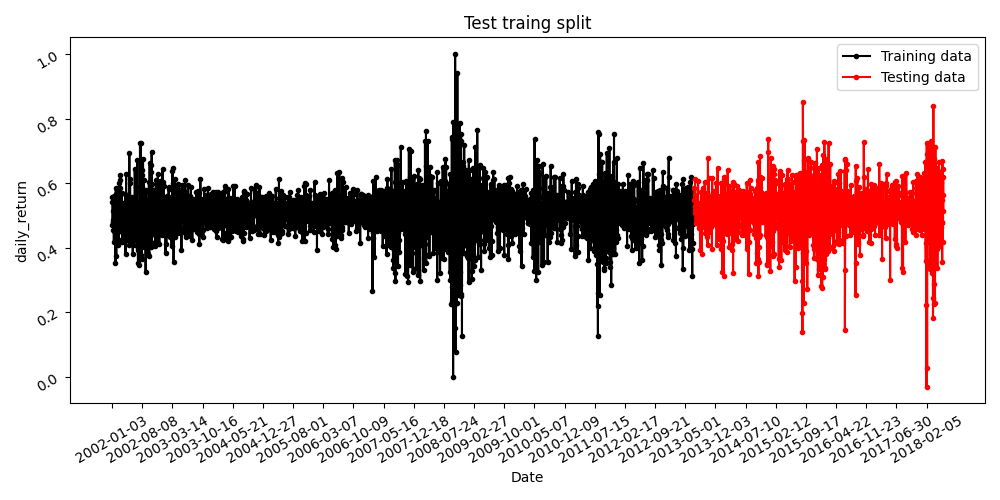

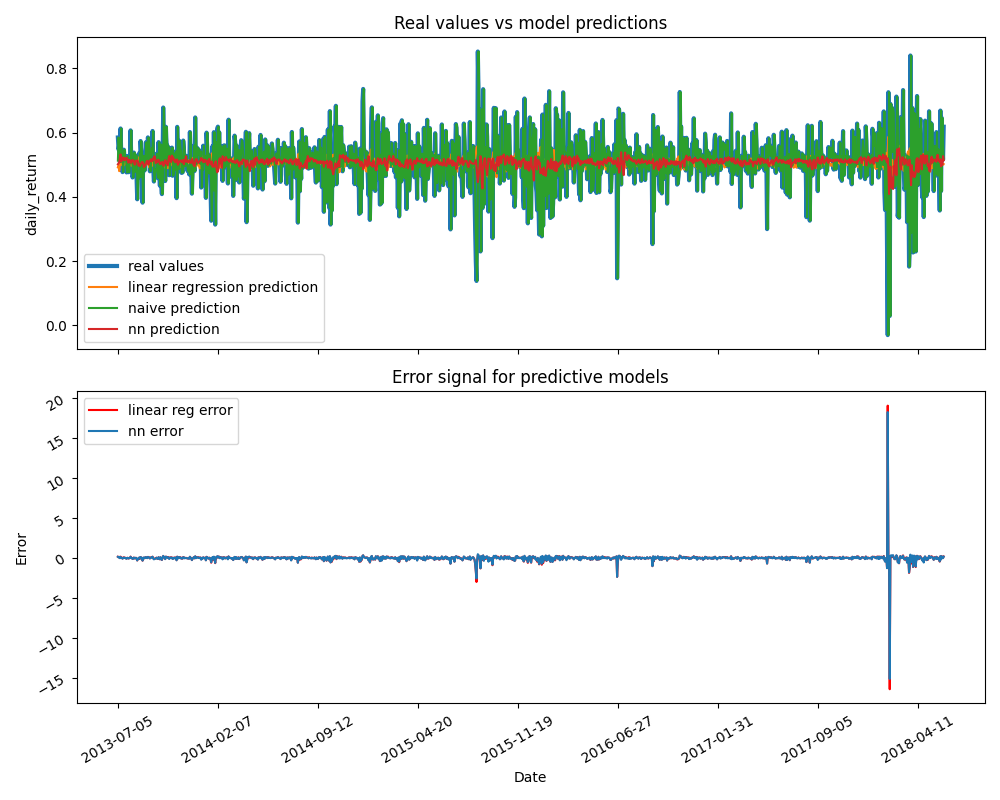

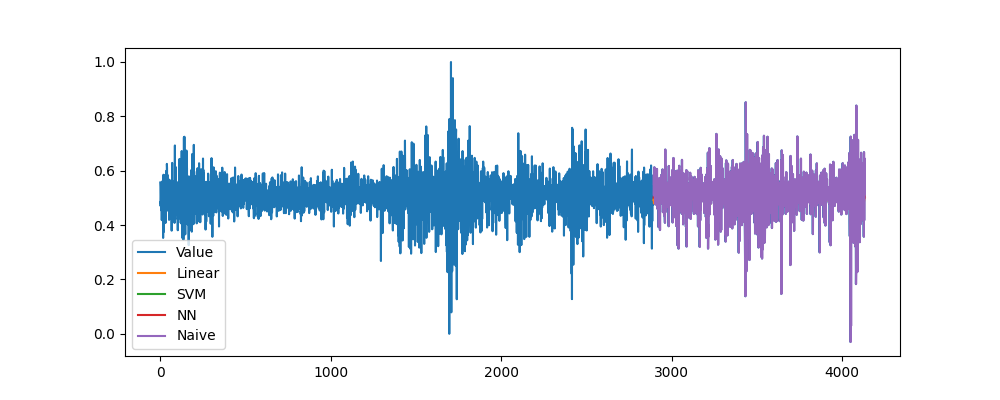

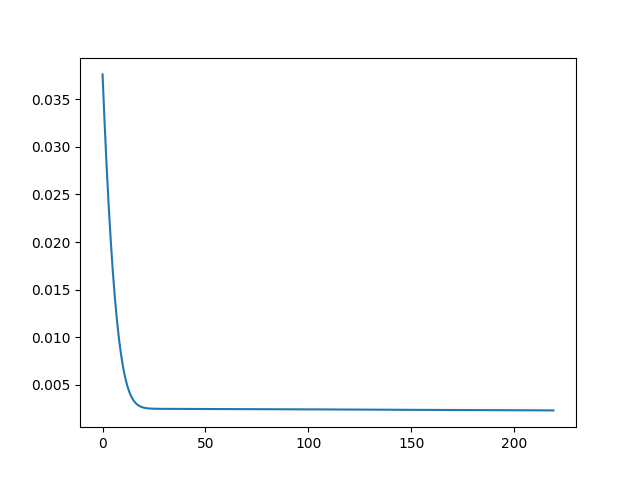

In [42]:
# playing around with a specific mlp

# initialize class object
run = time_series_prediction(df_returns['date'],data,15,1)# pass: time series dates, univariate time series, lag window length, a number of steps ahead to predict
run.sliding_window_1(verbose=0) # time series to supervised ML problem
run.train_test_split(split=split) # testing and training dataset split
run.test_train_plot(steps=150,ylabel='daily_return')    # visualize training split

# perform some prediction tasks
run.naive_model()
run.linear_regression()
run.neural_net_mlp(model_tunning=False,verbose=0,
                        hidden_layer_sizes=(100,100,100),
                        activation='relu',
                        learning_rate='adaptive',
                        learning_rate_init=0.00001,
                        solver='adam'
                        )

# visualize results
run.vis_results_time_series(second_plot='error',ylabel='daily_return')

# tabulate results
tabulated_results_0 = run.results()
tabulated_results_0.plot(figsize=(10,4))
display(tabulated_results_0)

# loss curve
plt.figure()
plt.plot(run.nn_loss_curve)

In [40]:
# what is the accuracy of price movements for these predictions

# data to feed to hit_rate function:
dates = tabulated_results_0['date'].iloc[split+window_length:]
original_values = tabulated_results_0['Value'].iloc[split+window_length:]
lin_predictions = tabulated_results_0['Linear'].iloc[split+window_length:]
nn_predictions =  tabulated_results_0['NN'].iloc[split+window_length:]
naive_predictions =  tabulated_results_0['Naive'].iloc[split+window_length:]

# hit rate calculations
print('Linear Regression:')
df_lin = hit_rate(dates,original_values,lin_predictions)

print('NN:')
df_nn = hit_rate(dates,original_values,nn_predictions)

print('Naive:')
df_naive = hit_rate(dates,original_values,naive_predictions)

Linear Regression:
Movement prediction accuracy: 57.52 %
Confusion matrix:
[[1278  230]
 [ 999  386]]
NN:
Movement prediction accuracy: 48.15 %
Confusion matrix:
[[1145  363]
 [1137  248]]
Naive:
Movement prediction accuracy: 43.9 %
Confusion matrix:
[[1099  409]
 [1214  171]]


Some conclusions:
- predicting the daily returns delivers some poor RMSE resutlts
- evaluating the models based on accuracy is does much better
- use rmse and accuracy
- when looking at the real values against predicted values for daily returns you can see the models get a pretty good "average guess". I say average guess because the models predictions are about in the middle of the expected range of values. 
-   if you were to plot the distribution of daily returns, you would see the models are "guessing" to the centroid of the distribution. They are terrible at getting the outliers correct, but on average guess well enough to deliver >50% accuracy. 